In [38]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [39]:
print(train_data.shape) #list of 25000 lists
print(train_data[0]) #intengers encoding words, max is 9999
print(train_labels[0]) #class label: 0=negative, 1=positive

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [40]:
#function to decode the integer based review into a real phrase
def decode_review(review):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(v, k) for (k,v) in word_index.items()])
    decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in review])
    print(decoded_review)

decode_review(train_data[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [41]:
#the list of reviews all have different lenghts... we need a way to standaride it...
#we will be using multi-hot encoding
#since the words are from range 0 to 9999, we'll create an array of zeros and ones
#we initialize the array to all zeros...
#we put ones at the indexes of the words used in the review....
#for example [8,5] would have ones in the position 8 and 5 out of 10000.

import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    #NB se
    #matrix of len(sequence) x dimensions
    results = np.zeros((len(sequence), dimension))
    for i, list in enumerate(sequence):
        for idx in list:
            results[i, idx] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0, :10])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [42]:
#lets convert labels to np just to be sure of compatability issues
y_train = np.asarray(train_labels).astype('float32')
y_labels = np.asarray(test_labels).astype('float32')
print(y_train[0:10])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [43]:
#our first model... i trust in what the book says
#we'll learn later how to properly choose hyperparameters

from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [44]:
#we split our training data into training set and validation set
x_train_set = x_train[:10000]
x_val_set = x_train[10000:]
y_train_set = y_train[:10000]
y_val_set = y_train[10000:]

In [45]:
#we traing the model using the .fit function
history = model.fit(
    x_train_set, y_train_set,
    epochs=20,
    batch_size=256,
    validation_data=(x_val_set, y_val_set)
)

Epoch 1/20
40/40 [==============================] - 1s 25ms/step - loss: 0.5390 - accuracy: 0.7626 - val_loss: 0.4659 - val_accuracy: 0.7930
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.8996 - val_loss: 0.3538 - val_accuracy: 0.8532
Epoch 3/20
40/40 [==============================] - 0s 5ms/step - loss: 0.2202 - accuracy: 0.9287 - val_loss: 0.3047 - val_accuracy: 0.8789
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1605 - accuracy: 0.9494 - val_loss: 0.2973 - val_accuracy: 0.8803
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9665 - val_loss: 0.3068 - val_accuracy: 0.8823
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9744 - val_loss: 0.3486 - val_accuracy: 0.8763
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0707 - accuracy: 0.9835 - val_loss: 0.4060 - val_accuracy: 0.8685
Epoch 8/20
40/40 [=

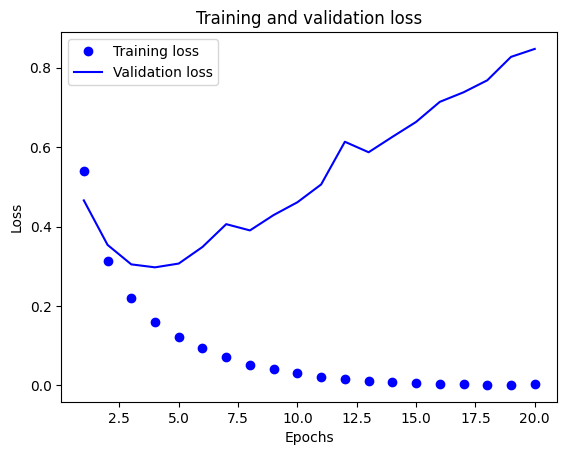

In [46]:
#let plot the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") #blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

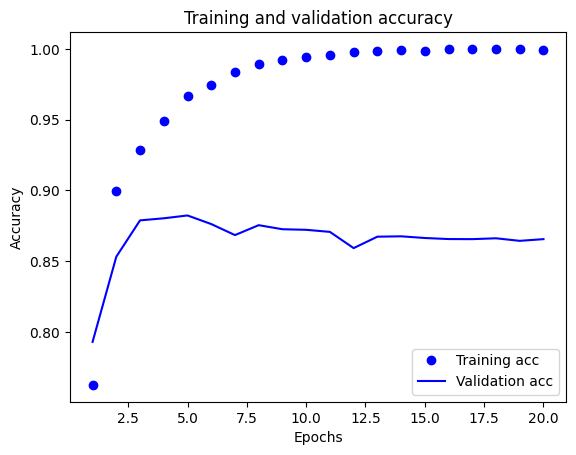

In [47]:
#let plot the training and validation accuracy
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training acc") #blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation acc") #blue line
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
#current results
results = model.evaluate(x_test, y_labels)


782/782 [==============================] - 0s 598us/step - loss: 0.8941 - accuracy: 0.8544
